In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LinearRegression

In [25]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

# Introduction

Like many cities in the US, Washington D.C. has rental bike scattered at parking stations throughout the city. You can take the bike from one part of the city and park it in another, making it a very convenient tool for tourists.

Today we're looking to try to predict the number of bikes rented at any given hour in Washington DC. Let's take a look at the data.

## Preprocessing

In [26]:
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Since we're taking a look at the number of bikes per given hour, it makes sense to take what the most common bike counts per hour might look like. Let's use a histogram.

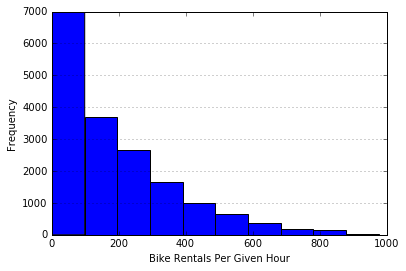

In [27]:
bike_rentals["cnt"].plot.hist(bins = 10)
plt.xlabel("Bike Rentals Per Given Hour")
plt.grid(axis = 'y', alpha = 0.75)

In [28]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [29]:
def assign_label(hour):
    if 6 < hour <= 12: 
        return 1
    elif 12 < hour <= 18:
        return 2
    elif 18 < hour < 24:
        return 3
    elif 0 <= hour <= 6:
        return 4

In [30]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [31]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


I selected the mean squared error as the test metric this time, because we are going to be predicting a continuous variable using regression, and mean_squared_error is a reliable metric for regression type problems. 

In [65]:
np.random.seed(101214)

train, test = train_test_split(bike_rentals,train_size = 0.8)

## Linear Regression

In [66]:
columns = list(train.columns)
columns.remove("cnt")
columns.remove("casual")
columns.remove("registered")
columns.remove("dteday")

lr = LinearRegression()
lr.fit(train[columns], train["cnt"])

predictions = lr.predict(test[columns])

mse = mean_squared_error(predictions, test["cnt"])
print('MSE: {}'.format(mse))

MSE: 15845.679605899868


### Postmortem

Our intention of calculating the Linear Regression RMSE is as the baseline to which we compare other algorithms to. In this case, the error is quite high for an rmse value, implying the Linear Regression is not predicting the values very well....maybe a non linear model is needed? Let's compared it to an error statistic provided by the other models.

## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

In [68]:
start = time.time()
dc_tree = DecisionTreeRegressor()
grid = GridSearchCV(estimator = dc_tree, param_grid= {
    "min_samples_split": [2, 3, 4, 5],
    "splitter": ["best", "random"],
    "max_depth": [None, 1, 2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": ["sqrt", "auto"],
})
grid.fit(train[columns], train["cnt"])

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'max_features': ['sqrt', 'auto'], 'max_depth': [None, 1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [69]:
dc_tree = grid.best_estimator_
dc_tree.fit(train[columns], train["cnt"])

predictions = dc_tree.predict(test[columns])
mse = mean_squared_error(test['cnt'], predictions)
print('It took {} seconds'.format(time.time() - start))
print('MSE: {}'.format(mse))

It took 14.262193441390991 seconds
MSE: 3070.145034369137


### Postmortem

Already with our decision tree regressor, we are achieving a 5 fold decrease in error compared to our Linear Regression algorithm. This is a good start, though our Random Forest algorithm on average is almost guaranteed to get even better results; Let's take a look below.

## Random Forest

In [70]:
start = time.time()
rf = RandomForestRegressor()
grid = GridSearchCV(estimator = rf, param_grid= {
    "min_samples_split": [2, 5],
    "max_depth" : [None, 1, 2, 4],
    "min_samples_leaf" : [1, 2, 5],
    "max_features" : ["sqrt", "auto"],
})
grid.fit(train[columns], train["cnt"])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'auto'], 'max_depth': [None, 1, 2, 4], 'min_samples_leaf': [1, 2, 5], 'min_samples_split': [2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
rf = grid.best_estimator_
rf.fit(train[columns], train["cnt"])

predictions = rf.predict(test[columns])
mse = mean_squared_error(test['cnt'], predictions)
print('It took {} seconds'.format(time.time() - start))
print('MSE: {}'.format(mse))

It took 18.663079977035522 seconds
MSE: 2219.3527481389688


### Postmortem

While our Random Forest took approximately 4 seconds longer to train, it has close to a 30% reduction in error compared to our Decision Tree. At this point we have to consider whether we can justify the extra time to train versus the accuracy gained based on our need for the algorithm to be quickly responsive, scale well to different datasets, as well as our computing power. For the most part it is going to be worth it to use a Random Forest over a Decision Tree.

## Neural Network

In [ ]:
start = time.time()
mlp = MLPRegressor()
grid = GridSearchCV(estimator = mlp, param_grid= {'hidden_layer_sizes': [(12,), (64,), (128,)],
                                                  'activation': ['logistic','tanh', 'relu'] 
})
grid.fit(train[columns], train["cnt"])
mlp = grid.best_estimator_

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [ ]:
mlp.fit(train[columns], train["cnt"])
predictions = mlp.predict(test[columns])
mse = mean_squared_error(predictions, test["cnt"])
print('It took {} seconds'.format(time.time() - start))
print('MSE: {}'.format(mse))

It took 1362.843740940094 seconds
MSE: 20769.059650554234


### Postmortem

While neural networks are generally very strong for classification problems, for regression problems they tend to score lower than linear regression and random forest algorithms. Accordingly our neural network has a much higher mse than any of our other algorithms, even our baseline algorithm of linear regression.

# Results

In light of this, our best algorithm, achieving both a balance of accuracy and computational speed is the Random Forest algorithm. In some cases the Decision Tree might be usable for it's faster computational speed, but otherwise the Random Forest algorithm will generally win out as we tend to value accracy higher than speed.